In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [582]:
x_train = pd.read_csv('departure-delay2/x_train.csv')
x_test = pd.read_csv('departure-delay2/x_test.csv')
y_train = pd.read_csv('departure-delay2/y_train.csv')


In [583]:
x_test.shape

(581028, 29)

In [584]:
y_train.head(5)

,id,DelayTime
0,0,17.0
1,1,35.0
2,2,53.0
3,3,18.0
4,4,465.0


In [585]:
y_train.shape

(1355730, 2)

In [586]:
x_train.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6228008,2008,11,21,5,1500.0,1443,1557.0,1534,EV,...,7.0,16.0,0,N,0,17.0,0.0,6.0,0.0,0.0
1,4732721,2008,8,16,6,2000.0,1925,2149.0,2105,AA,...,7.0,14.0,0,N,0,31.0,0.0,9.0,0.0,4.0
2,472452,2008,1,26,6,1953.0,1900,2103.0,2020,9E,...,15.0,14.0,0,N,0,0.0,0.0,0.0,0.0,43.0
3,5300680,2008,9,15,1,1233.0,1215,1355.0,1350,AA,...,10.0,7.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2364574,2008,4,13,7,1325.0,540,1604.0,752,CO,...,10.0,27.0,0,N,0,465.0,0.0,27.0,0.0,0.0


In [587]:
x_train.shape

(1355730, 29)

In [588]:
x_test.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6544326,2008,12,28,7,1658.0,1645,1721.0,1720,WN,...,3.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,14847,2008,1,7,1,1933.0,1855,2032.0,2005,WN,...,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,27.0
2,3624477,2008,7,9,3,1131.0,1120,1220.0,1210,WN,...,3.0,14.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,456890,2008,1,15,2,1241.0,1208,1323.0,1300,9E,...,5.0,24.0,0,N,0,0.0,0.0,0.0,0.0,23.0
4,2861412,2008,5,22,4,1037.0,1000,1130.0,1105,9E,...,6.0,16.0,0,N,0,25.0,0.0,0.0,0.0,0.0


In [589]:
x_test.shape

(581028, 29)

In [590]:
x_train['id'] = [i for i in range (len(x_train))]

In [591]:
x_train['id']

0                0
1                1
2                2
3                3
4                4
            ...   
1355725    1355725
1355726    1355726
1355727    1355727
1355728    1355728
1355729    1355729
Name: id, Length: 1355730, dtype: int64

In [592]:
x_train.shape

(1355730, 30)

# Описание данных
1. Unnamed: 0 - лишний безинформативный столбец
2. Year - год
3. Month - месяц
4. DayOfWeek - день недели
5. DepTime - время отправления в формате HH:MM (надо преобразовать)
6. CRSDepTime - запланированное время отправления в формате HH:MM (надо преобразовать)
7. ArrTime - время вылета в формате HH:MM (надо преобразовать)
8. CRSArrTime - запланированное время прибытия в формате HH:MM (надо преобразовать)
9. UniqueCarrier - ID оператора связи (???)
10. FlightNum - номер рейса 
11. TailNum - бортовой номер самолета
12. ActualElapsedTime - фактическое время полета в минутах
13. CRSElapsedTime - запланированное время полета в минутах
14. AirTime - время полета в воздухе в минутах
15. ArrDelay - задержка прибытия в минутах
16. Origin - аэропорт отправления
17. Dest - аэропорт назначения
18. Distance - дистанция полета
19. ??
20. ??
21. Cancelled - статус отмены (1 0)
22. CancellationCode - код отмены
23. Diverted - статус переадресации (???)
24. CarrierDelay - задержка в минутах, связанная с оператором связи
25. WeatherDelay - задержка в минутах, связанная с погодными факторами 
26. NASDelay - задержка в минутах, относящаяся к Национальной авиационной системе
27. SecurityDelay - задержка в минутах, связанная с факторами безопасности
28. LateAircraftDelay - задержка в минутах, связанная с опозданием воздушного судна

* Столбец Unnamed: 0 можно удалить сразу, никакой информации он не несет.
* Стоит преобразовать даты: сконкатенировать день, месяц и год. Учитывая, что год во всем     датасете 2008, возможно его стоит вообще удалить
* Последние столбцы с задержками можно схлопнуть в один total_factor_delay, но в них очень   много пропущенных значений, нужно оптимальным образом их заполнить (сначала попробую заполнить их медианным значением)
* Такие данные как CancellationCode, Diverted, Dest, Origin - вряд ли будут релевантны,       возможно их стоит удалить (нужно проверить) 

In [593]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355730 entries, 0 to 1355729
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1355730 non-null  int64  
 1   Year               1355730 non-null  int64  
 2   Month              1355730 non-null  int64  
 3   DayofMonth         1355730 non-null  int64  
 4   DayOfWeek          1355730 non-null  int64  
 5   DepTime            1355730 non-null  float64
 6   CRSDepTime         1355730 non-null  int64  
 7   ArrTime            1350732 non-null  float64
 8   CRSArrTime         1355730 non-null  int64  
 9   UniqueCarrier      1355730 non-null  object 
 10  FlightNum          1355730 non-null  int64  
 11  TailNum            1355727 non-null  object 
 12  ActualElapsedTime  1349848 non-null  float64
 13  CRSElapsedTime     1355584 non-null  float64
 14  AirTime            1349848 non-null  float64
 15  ArrDelay           1349848 non-n

In [594]:
x_train.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,id
count,1.355730e+06,1355730.0,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.350732e+06,1.355730e+06,1.355730e+06,...,1.350732e+06,1.355423e+06,1.355730e+06,1.355730e+06,872571.000000,872571.000000,872571.000000,872571.000000,872571.000000,1.355730e+06
mean,3.343270e+06,2008.0,6.113693e+00,1.574812e+01,3.984872e+00,1.518377e+03,1.467266e+03,1.610368e+03,1.634246e+03,2.184309e+03,...,6.809719e+00,1.823400e+01,3.171723e-04,4.021450e-03,19.159822,3.696012,15.020537,0.090438,25.308137,6.778645e+05
std,2.065971e+06,0.0,3.482474e+00,8.769966e+00,1.996001e+00,4.502490e+02,4.246592e+02,5.477562e+02,4.644314e+02,1.943356e+03,...,5.252686e+00,1.433670e+01,1.780651e-02,6.328729e-02,43.492431,21.551390,33.777777,2.064359,42.074585,3.913657e+05
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.519278e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,3.389322e+05
50%,3.244459e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.544000e+03,...,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,8.000000,6.778645e+05
75%,4.974685e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.423000e+03,...,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,21.000000,0.000000,15.000000,0.000000,33.000000,1.016797e+06
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,2.400000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1297.000000,1357.000000,392.000000,1316.000000,1.355729e+06


In [595]:
df_with_total_delay = x_train.copy()

In [596]:
df_with_total_delay[df_with_total_delay['ArrDelay'] < 0].count()

Unnamed: 0           124598
Year                 124598
Month                124598
DayofMonth           124598
DayOfWeek            124598
DepTime              124598
CRSDepTime           124598
ArrTime              124598
CRSArrTime           124598
UniqueCarrier        124598
FlightNum            124598
TailNum              124598
ActualElapsedTime    124598
CRSElapsedTime       124598
AirTime              124598
ArrDelay             124598
Origin               124598
Dest                 124598
Distance             124598
TaxiIn               124598
TaxiOut              124598
Cancelled            124598
CancellationCode     124598
Diverted             124598
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
id                   124598
dtype: int64

In [597]:
df_with_total_delay = df_with_total_delay.loc[df_with_total_delay['ArrDelay'] > 0]

In [598]:
# x_test = x_test.loc[x_test['ArrDelay'] > 0]

In [599]:
x_test.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                2112
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   2
ActualElapsedTime      2505
CRSElapsedTime           52
AirTime                2505
ArrDelay               2505
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 2112
TaxiOut                 148
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         206111
WeatherDelay         206111
NASDelay             206111
SecurityDelay        206111
LateAircraftDelay    206111
dtype: int64

In [600]:
df_with_total_delay['CarrierDelay'].fillna(df_with_total_delay['CarrierDelay'].median(), inplace = True)
df_with_total_delay['WeatherDelay'].fillna(df_with_total_delay['WeatherDelay'].median(), inplace = True)
df_with_total_delay['NASDelay'].fillna(df_with_total_delay['NASDelay'].median(), inplace = True)
df_with_total_delay['SecurityDelay'].fillna(df_with_total_delay['SecurityDelay'].median(), inplace = True)
df_with_total_delay['LateAircraftDelay'].fillna(df_with_total_delay['LateAircraftDelay'].median(), inplace = True)
df_with_total_delay['ArrDelay'].fillna(df_with_total_delay['ArrDelay'].median(), inplace = True)

x_test['CarrierDelay'].fillna(x_test['CarrierDelay'].median(), inplace = True)
x_test['WeatherDelay'].fillna(x_test['WeatherDelay'].median(), inplace = True)
x_test['NASDelay'].fillna(x_test['NASDelay'].median(), inplace = True)
x_test['SecurityDelay'].fillna(x_test['SecurityDelay'].median(), inplace = True)
x_test['LateAircraftDelay'].fillna(x_test['LateAircraftDelay'].median(), inplace = True)


x_test.isna().sum()

Unnamed: 0              0
Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              2112
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 2
ActualElapsedTime    2505
CRSElapsedTime         52
AirTime              2505
ArrDelay             2505
Origin                  0
Dest                    0
Distance                0
TaxiIn               2112
TaxiOut               148
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

In [601]:
df_with_total_delay[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay']].describe()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay
count,1.206216e+06,1.206216e+06,1.206216e+06,1.206216e+06,1.206216e+06,1.206216e+06
mean,1.441333e+01,2.673678e+00,1.141900e+01,6.542278e-02,2.052062e+01,4.789245e+01
std,3.777946e+01,1.840444e+01,2.931334e+01,1.756258e+00,3.661349e+01,5.737963e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01
50%,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00,2.900000e+01
75%,1.300000e+01,0.000000e+00,8.000000e+00,0.000000e+00,2.200000e+01,6.100000e+01
max,2.436000e+03,1.297000e+03,1.357000e+03,3.920000e+02,1.316000e+03,2.461000e+03


Минимальное значение ArrDelay - меньше нуля, необходимо почистить

In [602]:
df_with_total_delay.isna().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              3
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
id                   0
dtype: int64

In [603]:
df_with_total_delay

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,id
0,6228008,2008,11,21,5,1500.0,1443,1557.0,1534,EV,...,16.0,0,N,0,17.0,0.0,6.0,0.0,0.0,0
1,4732721,2008,8,16,6,2000.0,1925,2149.0,2105,AA,...,14.0,0,N,0,31.0,0.0,9.0,0.0,4.0,1
2,472452,2008,1,26,6,1953.0,1900,2103.0,2020,9E,...,14.0,0,N,0,0.0,0.0,0.0,0.0,43.0,2
3,5300680,2008,9,15,1,1233.0,1215,1355.0,1350,AA,...,7.0,0,N,0,2.0,0.0,2.0,0.0,8.0,3
4,2364574,2008,4,13,7,1325.0,540,1604.0,752,CO,...,27.0,0,N,0,465.0,0.0,27.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355725,3767267,2008,7,7,1,945.0,925,1105.0,1045,OH,...,12.0,0,N,0,20.0,0.0,0.0,0.0,0.0,1355725
1355726,2145289,2008,4,11,5,1516.0,1502,1613.0,1605,FL,...,14.0,0,N,0,2.0,0.0,2.0,0.0,8.0,1355726
1355727,652288,2008,2,17,7,1930.0,1920,2027.0,2020,WN,...,10.0,0,N,0,2.0,0.0,2.0,0.0,8.0,1355727
1355728,6930279,2008,12,1,1,757.0,705,1104.0,950,AA,...,31.0,0,N,0,0.0,52.0,22.0,0.0,0.0,1355728


In [604]:
df_with_total_delay['Total_delay'] = df_with_total_delay['CarrierDelay'] + df_with_total_delay['WeatherDelay'] +\
                                     df_with_total_delay['NASDelay'] + df_with_total_delay['SecurityDelay'] +\
                                     df_with_total_delay['LateAircraftDelay']


x_test['Total_delay'] = x_test['CarrierDelay'] + x_test['WeatherDelay'] +\
                                     x_test['NASDelay'] + x_test['SecurityDelay'] +\
                                     x_test['LateAircraftDelay']


df_with_total_delay['Total_delay'].describe()

count    1.206216e+06
mean     4.909206e+01
std      5.652774e+01
min      1.200000e+01
25%      1.200000e+01
50%      2.900000e+01
75%      6.100000e+01
max      2.461000e+03
Name: Total_delay, dtype: float64

In [605]:
x_test['Total_delay'].describe()

count    581028.000000
mean         45.120841
std          54.648073
min          12.000000
25%          12.000000
50%          24.000000
75%          56.000000
max        1951.000000
Name: Total_delay, dtype: float64

In [606]:
df_with_total_delay['Total_delay'].isna().sum() # проверка что все Nan изменены

0

<AxesSubplot:>

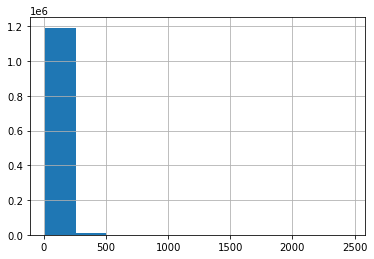

In [607]:
df_with_total_delay['Total_delay'].hist()

In [608]:
print(df_with_total_delay['Total_delay'].shape)
dev = (df_with_total_delay['Total_delay']-df_with_total_delay['Total_delay'].mean()).abs()
# Стандартное отклонение
std = df_with_total_delay['Total_delay'].std()
# Фильтруем исходный набор данных
df_with_total_delay = df_with_total_delay[~(dev>3*std)]
#правило трех сигм для отброса выборосов
# dev_2 = (x_test['Total_delay']-x_test['Total_delay'].mean()).abs()
# std_2 = x_test['Total_delay'].std()
# x_test = x_test[~(dev_2>3*std_2)]



(1206216,)


In [609]:
df_with_total_delay['Total_delay'].describe()

count    1.183406e+06
mean     4.417919e+01
std      4.120524e+01
min      1.200000e+01
25%      1.200000e+01
50%      2.800000e+01
75%      5.900000e+01
max      2.180000e+02
Name: Total_delay, dtype: float64

In [610]:
df_with_total_delay['Total_delay'].isna().sum()

0

(1183406,)


<AxesSubplot:>

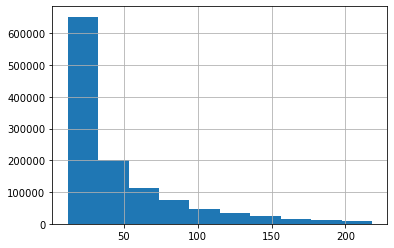

In [611]:
print(df_with_total_delay['Total_delay'].shape)
df_with_total_delay['Total_delay'].hist()

In [612]:
df_with_total_delay.drop(['Unnamed: 0','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay'],\
                         axis = 1, inplace = True)

x_test.drop(['Unnamed: 0','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay'],\
                         axis = 1, inplace = True)

/Users/jokkojja/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [613]:
df_with_total_delay.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,id,Total_delay
0,2008,11,21,5,1500.0,1443,1557.0,1534,EV,5055,...,ATL,XNA,589,7.0,16.0,0,N,0,0,23.0
1,2008,8,16,6,2000.0,1925,2149.0,2105,AA,1043,...,MIA,STL,1068,7.0,14.0,0,N,0,1,44.0
2,2008,1,26,6,1953.0,1900,2103.0,2020,9E,5832,...,TVC,DTW,207,15.0,14.0,0,N,0,2,43.0
3,2008,9,15,1,1233.0,1215,1355.0,1350,AA,1501,...,MSY,DFW,448,10.0,7.0,0,N,0,3,12.0
5,2008,8,29,5,1704.0,1555,1903.0,1730,MQ,4723,...,JFK,RDU,426,4.0,42.0,0,N,0,5,93.0


<AxesSubplot:xlabel='DayOfWeek'>

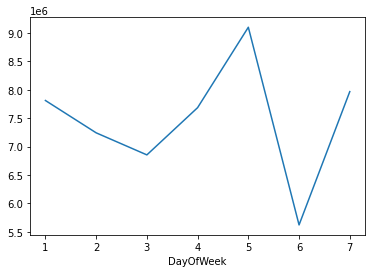

In [614]:
df_with_total_delay.groupby('DayOfWeek')['Total_delay'].sum().plot()

In [615]:
df_with_total_delay.groupby('Cancelled')['Total_delay'].sum()
#после чистки остались только неотмененные рейсы, удаляем стоблец Cancelled

Cancelled
0    52281919.0
Name: Total_delay, dtype: float64

In [616]:
df_with_total_delay.drop('Cancelled', axis = 1, inplace = True)

x_test.drop('Cancelled', axis = 1, inplace = True)

/Users/jokkojja/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [617]:
df_with_total_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183406 entries, 0 to 1355729
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1183406 non-null  int64  
 1   Month              1183406 non-null  int64  
 2   DayofMonth         1183406 non-null  int64  
 3   DayOfWeek          1183406 non-null  int64  
 4   DepTime            1183406 non-null  float64
 5   CRSDepTime         1183406 non-null  int64  
 6   ArrTime            1183406 non-null  float64
 7   CRSArrTime         1183406 non-null  int64  
 8   UniqueCarrier      1183406 non-null  object 
 9   FlightNum          1183406 non-null  int64  
 10  TailNum            1183404 non-null  object 
 11  ActualElapsedTime  1183406 non-null  float64
 12  CRSElapsedTime     1183406 non-null  float64
 13  AirTime            1183406 non-null  float64
 14  Origin             1183406 non-null  object 
 15  Dest               1183406 non-n

In [618]:
def getTime(t):
    if len(t) == 4:
        
        if t == "2400":
            t = "0000"
            
        t = t + '00' 
        return t[:2] + ':' + t[2:4] + ':' + t[4:]
    elif len(t) == 3:
    
        t = '0' + t + '00'
        return t[:2] + ':' + t[2:4] + ':' + t[4:]
    

In [619]:
x_train_first_vers = df_with_total_delay.drop('UniqueCarrier', axis = 1)

x_test = x_test.drop('UniqueCarrier', axis = 1)

In [620]:
x_train_first_vers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183406 entries, 0 to 1355729
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1183406 non-null  int64  
 1   Month              1183406 non-null  int64  
 2   DayofMonth         1183406 non-null  int64  
 3   DayOfWeek          1183406 non-null  int64  
 4   DepTime            1183406 non-null  float64
 5   CRSDepTime         1183406 non-null  int64  
 6   ArrTime            1183406 non-null  float64
 7   CRSArrTime         1183406 non-null  int64  
 8   FlightNum          1183406 non-null  int64  
 9   TailNum            1183404 non-null  object 
 10  ActualElapsedTime  1183406 non-null  float64
 11  CRSElapsedTime     1183406 non-null  float64
 12  AirTime            1183406 non-null  float64
 13  Origin             1183406 non-null  object 
 14  Dest               1183406 non-null  object 
 15  Distance           1183406 non-n

In [621]:
x_train_first_vers = df_with_total_delay.drop(['TailNum', 'Origin', 'Dest', 'CancellationCode', 'UniqueCarrier', 'Diverted'], axis = 1)

x_test = x_test.drop(['TailNum', 'Origin', 'Dest', 'CancellationCode', 'Diverted'], axis = 1)

In [622]:
x_test.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              2112
CRSArrTime              0
FlightNum               0
ActualElapsedTime    2505
CRSElapsedTime         52
AirTime              2505
Distance                0
TaxiIn               2112
TaxiOut               148
Total_delay             0
dtype: int64

In [623]:
x_test['ArrTime'].fillna(x_test['ArrTime'].median(), inplace = True)
x_test['ActualElapsedTime'].fillna(x_test['ActualElapsedTime'].median(), inplace = True)
x_test['CRSElapsedTime'].fillna(x_test['CRSElapsedTime'].median(), inplace = True)
x_test['AirTime'].fillna(x_test['AirTime'].median(), inplace = True)
x_test['TaxiIn'].fillna(x_test['TaxiIn'].median(), inplace = True)
x_test['TaxiOut'].fillna(x_test['TaxiOut'].median(), inplace = True)

In [624]:
y_train_first_vers = x_train_first_vers.merge(y_train, on = 'id')
y_train_first_vers = y_train_first_vers['DelayTime']

In [625]:
x_train_first_vers.drop('id', axis = 1, inplace = True)

In [626]:
x_train_first_vers.shape

(1183406, 16)

In [627]:
x_test.shape

(581028, 16)

In [634]:
x_test.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Total_delay
count,581028.0,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000,581028.000000
mean,2008.0,6.105071,15.765961,3.984722,1518.901229,1467.954938,1609.993374,1634.175589,2184.156287,133.281809,134.332552,108.246215,765.813398,6.817589,18.226925,45.120841
std,0.0,3.482711,8.790963,1.995887,451.036177,425.017662,548.199241,465.109149,1947.841205,72.052858,71.421299,68.621287,574.949273,5.312606,14.341152,54.648073
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,15.000000,-21.000000,1.000000,24.000000,0.000000,0.000000,12.000000
25%,2008.0,3.000000,8.000000,2.000000,1203.000000,1135.000000,1316.000000,1325.000000,610.000000,80.000000,82.000000,58.000000,338.000000,4.000000,10.000000,12.000000
50%,2008.0,6.000000,16.000000,4.000000,1546.000000,1510.000000,1715.000000,1705.000000,1541.000000,116.000000,116.000000,90.000000,606.000000,6.000000,14.000000,24.000000
75%,2008.0,9.000000,23.000000,6.000000,1901.000000,1818.000000,2030.000000,2015.000000,3421.000000,165.000000,165.000000,137.000000,997.000000,8.000000,21.000000,56.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9740.000000,1114.000000,660.000000,1091.000000,4962.000000,207.000000,422.000000,1951.000000


In [628]:
# kf = KFold(n_splits=5, shuffle=True, random_state=241)
# reg = SGDRegressor(learning_rate='constant', eta0=0.009, fit_intercept=True, random_state=42)
reg = LinearRegression()
# params = {'c' : }
# grid = GridSearchCV()
reg.fit(x_train_first_vers, y_train_first_vers)

LinearRegression()

In [629]:
# imp = SimpleImputer(missing_values=np.nan, strategy='median')
# imp
# imp = imp.fit(x_test)
# x_test = imp.transform(x_test)

In [630]:
y_pred = reg.predict(x_test)

In [631]:
y_pred.shape

(581028,)

In [632]:
y_pred

array([ 21.79401678,  36.23284358,  10.90130778, ...,  13.25007244,
       110.20754842,  45.30181813])

In [564]:
y_train_first_vers.shape

(1183406,)

In [570]:
pd.Series(y_pred, name='DelayTime').to_csv('predict.csv', index_label='id', header=True)

In [571]:
test = pd.read_csv('predict.csv')
test

,id,DelayTime
0,0,21.794017
1,1,36.232844
2,2,10.901308
3,3,31.037295
4,4,34.972317
...,...,...
581023,581023,86.475884
581024,581024,24.089792
581025,581025,13.250072
581026,581026,110.207548
